# Boston AirBnB Data Analysis

A notebook that contains an analysis of AirBnB Data for Boston for 2017, following the CRISP-DM process as part of the Data Science Nanodegree with Udacity.

In [1]:
# Import libraries for analysis
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

In [2]:
# Set max columns to be able to browse all data columns
pd.set_option("display.max_columns", 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

## 1) Business Understanding

what are the questions you are interested in tackling.   

   a) What is the monthly average price/night for the city?   
   b) What is the average price Monday to Sunday?   
   c) What is the monthly occupancy ratio for the city?   
   d) What is the average price/night per neighbourhood?   
   e) What is the occupancy ratio per neighbourhood?    


What are we asking - is the price set correctly to maximize return?


## 2) Data Understanding

Gather and analyze the data available. 

### Data Gathering

In [3]:
# Read in datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

### Data Assessment

In [4]:
# Look at each dataset to get a feel of the data
calendar.head(10)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


In [5]:
calendar.sample(10)

,listing_id,date,available,price
487550,7125052,2016-12-04,f,NaN
813660,9125711,2017-05-01,f,NaN
680763,13521992,2017-03-13,t,$138.00
712533,13376457,2017-04-13,f,NaN
525726,14636981,2017-03-17,t,$80.00
649193,1102623,2017-08-27,f,NaN
1154868,4928894,2017-08-28,f,NaN
233958,4553903,2016-09-12,f,NaN
684643,9844242,2016-12-11,f,NaN
847263,12183851,2017-05-30,t,$70.00


In [6]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [7]:
calendar.shape

(1308890, 4)

In [8]:
listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [9]:
listings.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2541,12856007,https://www.airbnb.com/rooms/12856007,20160906204935,2016-09-07,Cozy Boston apartment,Cozy room in a typical Boston apartment with a...,Lovely space in a quiet neighborhood with easy...,Cozy room in a typical Boston apartment with a...,none,Beautiful Bostonian neighborhood outside the c...,NaN,There are several T lines nearby and a bus tha...,Guest have access to the kitchen and living ro...,"Usually when I rent the room I am out of town,...",Please leave shoes at the front door. Guests s...,NaN,NaN,https://a2.muscache.com/im/pictures/40d31c2d-0...,NaN,1781817,https://www.airbnb.com/users/show/1781817,Raquel,2012-02-20,"Boston, Massachusetts, United States","By profession, I am an educator and have worke...",within a day,100%,100%,f,https://a2.muscache.com/im/pictures/a46d3049-d...,https://a2.muscache.com/im/pictures/a46d3049-d...,NaN,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Englewood Avenue, Boston, MA 02135, United States",NaN,Brighton,NaN,Boston,MA,02135,Boston,"Boston, MA",US,United States,42.337308,-71.147497,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,Heating,...",NaN,$55.00,NaN,NaN,NaN,$10.00,1,$15.00,3,1125,2 months ago,NaN,0,4,34,309,2016-09-06,3,2016-05-23,2016-08-01,80.0,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,moderate,f,f,1,0.83
3505,14650655,https://www.airbnb.com/rooms/14650655,20160906204935,2016-09-07,Luxury Brighton Studio w/ Brand New Kitchen,This is a luxury unit that is convenient for t...,"The studio comfortably fits two people, but th...",This is a luxury unit that is convenient for t...,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a2.muscache.com/im/pictures/aeab3937-0...,https://a2.muscache.com/im/pictures/aeab3937-0...,https://a2.muscache.com/im/pictures/aeab3937-0...,https://a2.muscache.com/im/pictures/aeab3937-0...,2356643,https://www.airbnb.com/users/show/2356643,Ahmed,2012-05-12,"Cambridge, Massachusetts, United States",I'm a former manager at a large accounting fir...,within a few hours,94%,84%,f,https://a1.muscache.com/im/users/2356643/profi...,https://a1.muscache.com/im/users/2356643/profi...,Theater District,18,18,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Western Avenue, Boston, MA 02134, United States",Allston-Brighton,Allston,NaN,Boston,MA,02134,Boston,"Boston, MA",US,United States,42.362744,-71.129071,t,Apartment,Entire home/apt,3,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",NaN,$125.00,NaN,NaN,$100.00,$45.00,2,$30.00,1,1125,today,NaN,28,58,88,363,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [11]:
listings.shape

(3585, 95)

In [12]:
# Verify the same number of listing ids
calendar.shape[0]/365

3586.0

In [13]:
reviews.head(10)
            

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


In [14]:
reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
51803,12736032,79384665,2016-06-12,32785635,Charlene,The apartment is the perfect size with a large...
57245,6939126,41382283,2015-08-07,16770598,Nick,The apartment was in a good location a short w...
13968,322593,7217066,2013-09-11,6861481,Christine,Nous avons eu un merveilleux séjour à Boston !...
50863,7611271,41688366,2015-08-08,24597659,Jeanne,I work as part of a family dental sales and se...
37254,4430821,30638932,2015-04-25,10957988,Rhys,Nina was very friendly and helpful during our ...


In [15]:
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [16]:
reviews.shape

(68275, 6)

## 3) Prepare Data

Wrangle, clean, EDA and preprocess the data.

### Data Wrangling

In [69]:
# Missing values in any rows or columns
print(calendar.isnull().sum())
print()
print(listings.isnull().sum())
print()
print(reviews.isnull().sum())

listing_id    0
date          0
available     0
price         0
dtype: int64

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              143
space                               1057
description                            0
experiences_offered                    0
neighborhood_overview               1415
notes                               1975
transit                             1290
access                              1489
interaction                         1554
house_rules                         1192
thumbnail_url                        599
medium_url                           599
picture_url                            0
xl_picture_url                       599
host_id                                0
host_url                               0
host_name                              0
host_since          

In [18]:
# Check datatypes and convert

In [19]:
# Convert price into float
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)


In [20]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [21]:
# Convert Nan prices into 0 price
calendar['price'].fillna(0, inplace=True)
calendar.head(20)

,listing_id,date,available,price
0,12147973,2017-09-05,f,0.0
1,12147973,2017-09-04,f,0.0
2,12147973,2017-09-03,f,0.0
3,12147973,2017-09-02,f,0.0
4,12147973,2017-09-01,f,0.0
5,12147973,2017-08-31,f,0.0
6,12147973,2017-08-30,f,0.0
7,12147973,2017-08-29,f,0.0
8,12147973,2017-08-28,f,0.0
9,12147973,2017-08-27,f,0.0


In [22]:
# Convert column 'available' to a true boolean
calendar['available'] = calendar['available'] == 't'

In [23]:
calendar['available'].value_counts()

False    665853
True     643037
Name: available, dtype: int64

In [24]:
#calendar['date'].value_counts()

In [25]:
calendar['date'].min()

'2016-09-06'

In [26]:
calendar['date'].max()

'2017-09-05'

In [27]:
# Convert column 'date' to a true datetype
calendar['date'] = pd.to_datetime(calendar['date'])

In [76]:
calendar['date'].dt.strftime('%m')

0          09
1          09
2          09
3          09
4          09
           ..
1308885    09
1308886    09
1308887    09
1308888    09
1308889    09
Name: date, Length: 1308890, dtype: object

In [77]:
calendar['date'].dt.strftime('%w')

0          2
1          1
2          0
3          6
4          5
          ..
1308885    6
1308886    5
1308887    4
1308888    3
1308889    2
Name: date, Length: 1308890, dtype: object

In [ ]:
calendar['date'].dt

In [70]:
calendar['date'].head(20)

0    2017-09-05
1    2017-09-04
2    2017-09-03
3    2017-09-02
4    2017-09-01
5    2017-08-31
6    2017-08-30
7    2017-08-29
8    2017-08-28
9    2017-08-27
10   2017-08-26
11   2017-08-25
12   2017-08-24
13   2017-08-23
14   2017-08-22
15   2017-08-21
16   2017-08-20
17   2017-08-19
18   2017-08-18
19   2017-08-17
Name: date, dtype: datetime64[ns]

In [28]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

### Exploratory Data Analysis

In [29]:
df = calendar.groupby('listing_id')

In [30]:
df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,False,0.0
1,12147973,2017-09-04,False,0.0
2,12147973,2017-09-03,False,0.0
3,12147973,2017-09-02,False,0.0
4,12147973,2017-09-01,False,0.0
...,...,...,...,...
1308525,14504422,2017-06-21,False,0.0
1308526,14504422,2017-06-20,False,0.0
1308527,14504422,2017-06-19,False,0.0
1308528,14504422,2017-06-18,False,0.0


In [31]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,False,0.0
1,12147973,2017-09-04,False,0.0
2,12147973,2017-09-03,False,0.0
3,12147973,2017-09-02,False,0.0
4,12147973,2017-09-01,False,0.0


In [32]:
# Total revenue for all rooms for the year
calendar['price'].sum()

127603561.0

In [33]:
# Total occupancy ratio for the year
round(calendar['available'].mean()*100,1)

49.1

In [34]:
# Average price per night for the year
df['price'].mean().mean()

97.50364800061111

In [35]:
calendar['price'].mean()

97.48990442283156

In [36]:
# Total number of accomodation listings
calendar.shape[0]/365

3586.0

In [37]:
# Average revenue per listing for the year
avg_annual_revenue = round(calendar['price'].sum()/ (calendar.shape[0]/365),0)
avg_annual_revenue

35584.0

In [38]:
# Extract neighbourhood information from listings dataframe
list = listings[['id','neighbourhood_cleansed']]
list.head()

,id,neighbourhood_cleansed
0,12147973,Roslindale
1,3075044,Roslindale
2,6976,Roslindale
3,1436513,Roslindale
4,7651065,Roslindale


In [39]:
# Accomodation listings split by neighbourhood
list['neighbourhood_cleansed'].value_counts()

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [40]:
# Rename neighbourhood column
list = list.rename(index=str, columns={"id": "listing_id", "neighbourhood_cleansed":"neighbourhood"})
list.head()

,listing_id,neighbourhood
0,12147973,Roslindale
1,3075044,Roslindale
2,6976,Roslindale
3,1436513,Roslindale
4,7651065,Roslindale


In [41]:
# Merge calendar and list dataframes into new_df
new_df = pd.merge(calendar, list, on=['listing_id', 'listing_id'])

In [42]:
# Check data types are OK
new_df.dtypes

listing_id                int64
date             datetime64[ns]
available                  bool
price                   float64
neighbourhood            object
dtype: object

In [43]:
new_df.head()

,listing_id,date,available,price,neighbourhood
0,12147973,2017-09-05,False,0.0,Roslindale
1,12147973,2017-09-04,False,0.0,Roslindale
2,12147973,2017-09-03,False,0.0,Roslindale
3,12147973,2017-09-02,False,0.0,Roslindale
4,12147973,2017-09-01,False,0.0,Roslindale


In [44]:
new_df.shape

(1308890, 5)

In [45]:
new_df['neighbourhood'].isnull().sum()

0

In [46]:
new_df['neighbourhood'].dtype

dtype('O')

In [47]:
# Change neighbourhood to categorical variable 
new_df['neighbourhood'] = new_df['neighbourhood'].astype('category')



In [49]:
new_df['neighbourhood'].dtype

CategoricalDtype(categories=['Allston', 'Back Bay', 'Bay Village', 'Beacon Hill', 'Brighton', 'Charlestown', 'Chinatown', 'Dorchester', 'Downtown', 'East Boston', 'Fenway', 'Hyde Park', 'Jamaica Plain', 'Leather District', 'Longwood Medical Area', 'Mattapan', 'Mission Hill', 'North End', 'Roslindale', 'Roxbury', 'South Boston', 'South Boston Waterfront', 'South End', 'West End', 'West Roxbury'], ordered=False)

In [50]:
# List of months and days of weeks for visualizations
month_list=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
week_list=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

### a) What is the monthly average price/night for the city?

In [79]:
# Monthly average price per night
monthly_avg_price_per_night = new_df.groupby(new_df['date'].dt.strftime('%m'))['price'].mean()
monthly_avg_price_per_night = pd.DataFrame(monthly_avg_price_per_night).reset_index()
monthly_avg_price_per_night['date'] =monthly_avg_price_per_night.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
monthly_avg_price_per_night

,date,price
0,Jan,103.893870
1,Feb,102.386224
2,Mar,90.251876
3,Apr,94.211266
4,May,93.400671
5,Jun,96.332989
6,Jul,100.113839
7,Aug,101.624831
8,Sep,73.591002
9,Oct,97.311012


### b) What is the average price Monday to Sunday?

In [80]:
# Weekly average price per night
week_avg_price_per_night = new_df.groupby(new_df['date'].dt.strftime('%w'))['price'].mean()
week_avg_price_per_night = pd.DataFrame(week_avg_price_per_night).reset_index()
week_avg_price_per_night['date'] = week_avg_price_per_night['date'].replace(['0','1','2','3','4','5','6'], week_list)
week_avg_price_per_night

,date,price
0,Mon,98.017118
1,Tue,97.040569
2,Wed,95.844242
3,Thu,96.220988
4,Fri,96.876014
5,Sat,99.122764
6,Sun,99.339284


In [53]:
# Average price for each week of 2017
weekly = round(new_df.groupby(new_df['date'].dt.strftime('%W'))['price'].mean(),2)
weekly = pd.DataFrame(weekly).reset_index()
weekly.columns=['week_number','price']
weekly['week_number'] = weekly['week_number'].astype(int)
weekly

,week_number,price
0,0,108.28
1,1,104.27
2,2,104.37
3,3,104.03
4,4,102.91
5,5,101.35
6,6,101.94
7,7,103.01
8,8,103.03
9,9,101.85


### c) What is the monthly occupancy ratio for the city?

In [54]:
# Monthly occupancy rates
occ_ratio_per_month = round(new_df.groupby(new_df['date'].dt.strftime('%m'))['available'].mean()*100,1)
occ_ratio_per_month = pd.DataFrame(occ_ratio_per_month).reset_index()
occ_ratio_per_month['date'] = occ_ratio_per_month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
occ_ratio_per_month

,date,available
0,Jan,56.8
1,Feb,56.6
2,Mar,49.6
3,Apr,47.8
4,May,48.2
5,Jun,49.0
6,Jul,49.4
7,Aug,50.0
8,Sep,31.0
9,Oct,41.7


### d) What is the average price/night per neighbourhood?

In [55]:
# Average price per night by neighbourhood sorted top to bottom
new_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

neighbourhood
Bay Village                201.057534
West End                   191.030528
Chinatown                  158.845456
Back Bay                   147.364792
South Boston Waterfront    142.270870
Leather District           136.928767
Downtown                   134.830311
Fenway                     117.754426
Beacon Hill                116.668126
South Boston               110.805133
South End                  106.362661
Charlestown                105.921807
North End                  103.065313
Roxbury                     92.092237
Jamaica Plain               76.134207
East Boston                 73.569425
West Roxbury                71.336867
Brighton                    63.620215
Roslindale                  63.001174
Longwood Medical Area       61.722374
Mattapan                    60.093721
Dorchester                  57.370912
Mission Hill                54.444211
Allston                     47.410464
Hyde Park                   34.877950
Name: price, dtype: float64

In [56]:
# Average price per night for each month alphabetically
hood_avg_price_per_month = round(new_df.groupby('neighbourhood')['price'].mean(),2)
hood_avg_price_per_month = pd.DataFrame(hood_avg_price_per_month).reset_index()
hood_avg_price_per_month

,neighbourhood,price
0,Allston,47.41
1,Back Bay,147.36
2,Bay Village,201.06
3,Beacon Hill,116.67
4,Brighton,63.62
5,Charlestown,105.92
6,Chinatown,158.85
7,Dorchester,57.37
8,Downtown,134.83
9,East Boston,73.57


### e) What is the occupancy ratio per neighbourhood?

In [57]:
# Monthly occupancy rates by neighbourhood
hood_occ = round(new_df.groupby('neighbourhood')['available'].mean()*100,1)
hood_occ = pd.DataFrame(hood_occ).reset_index()
hood_occ

,neighbourhood,available
0,Allston,36.1
1,Back Bay,51.8
2,Bay Village,65.4
3,Beacon Hill,44.8
4,Brighton,46.2
5,Charlestown,52.5
6,Chinatown,50.3
7,Dorchester,64.8
8,Downtown,49.5
9,East Boston,53.5


### Further investigation to be continued not used in blog post

In [58]:
# Price per night per month per neighbourhood
hood_price_month = round(new_df.groupby(['neighbourhood',new_df['date'].dt.strftime('%m')])['price'].mean(),2)
hood_price_month = pd.DataFrame(hood_price_month).reset_index()
hood_price_month

,neighbourhood,date,price
0,Allston,01,56.02
1,Allston,02,55.39
2,Allston,03,47.09
3,Allston,04,45.92
4,Allston,05,41.82
...,...,...,...
295,West Roxbury,08,77.41
296,West Roxbury,09,50.07
297,West Roxbury,10,57.27
298,West Roxbury,11,76.93


## 4) Data Modeling

In [59]:
### None so far 

## 5) Evaluate the Results

### Explanatory Visualizations

In [60]:
current_palette = sns.color_palette("muted")

In [61]:
def create_plot(dataframe,x,y,ylim,title,xlabel,ylabel,meanline="price",xticklabel=False):
    """
    Plot creates bar chart visualizations
    
    INPUTS:
    dataframe: pandas dataframe containing columns to be plotted
    x: column of dataframe as a str - example "price"
    y: column of dataframe as a str - example "date"
    ylim: int upper boundary of y-axis
    title: str title for plot - example "Title"
    xlabel: str title for x-axis - example "Xlabel"
    ylabel: str title for y-axis - example "Ylabel"
    meanline: str indicating which mean to take "price" or "occupancy"
    xticklabel: boolean True or False if labels need to be rotated 90 degrees
    
    OUTPUT:
    barchart plot
    """
    
    # Create plot size
    f, ax = plt.subplots(figsize=(8,5))
    # Set background style
    sns.set_style("darkgrid")
    
    if y == "price":
        color="coral"
    else:
        color="cornflowerblue"
    
    # Plot data 
    sns.barplot(x,y,data=dataframe,color=color,saturation=.5,)
    
    # Add titles and labels
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.ylim(0,ylim)
    
    # Add mean line for year
    if meanline == 'price': 
        plt.axhline(calendar[meanline].mean(),color='r',label='Avg for Year')
    else:
        plt.axhline(calendar[meanline].mean()*100,color='b',label='Avg for Year')
    plt.legend();
    
    # Set x-axis labels and rotate vertical
    if(xticklabel):
        ax.set_xticklabels(hood_avg_price_per_month['neighbourhood'], rotation = 90,fontsize=12)
    
    # Move title and plot slightly further apart
    ttl = ax.title
    ttl.set_position([.5, 1.05])
    plt.show()

### a) What is the monthly average price/night for the city?

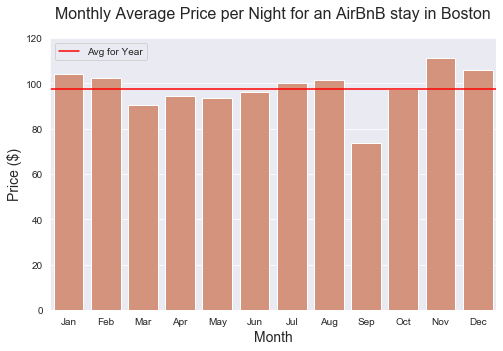

In [81]:
# Barplot visualization of monthly average price per night
[create_plot(monthly_avg_price_per_night,"date","price",120,
             title="Monthly Average Price per Night for an AirBnB stay in Boston",
             xlabel="Month",
             ylabel="Price ($)",
             meanline = "price")];

### b) What is the average price Monday to Sunday?

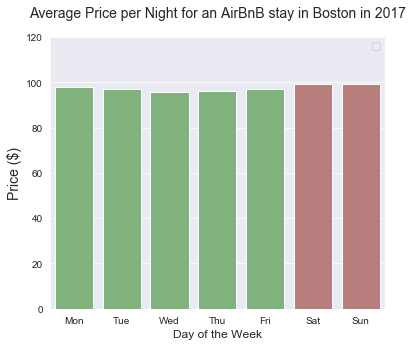

In [82]:
# Barplot visualization of average price Monday to Sunday

# Create variable for weekend
week["weekend"] = week["date"].isin(["Sat", "Sun"])

# Create plot size
f, ax = plt.subplots(figsize=(6,5))
# Set background style
sns.set_style("darkgrid")
# Plot data
sns.barplot(x="date",y="price",hue='weekend',data=week,dodge=False,
            palette=current_palette[2:4],saturation=0.5)

# Add titles and labels
plt.title("Average Price per Night for an AirBnB stay in Boston in 2017",fontsize=14)
plt.xlabel("Day of the Week",fontsize=12)
plt.ylabel("Price ($)",fontsize=14)
ax.legend('')

# Move title and plot slightly further apart
ttl = ax.title
ttl.set_position([.5, 1.05])

# Set y-axis to 120
plt.ylim(0,120);

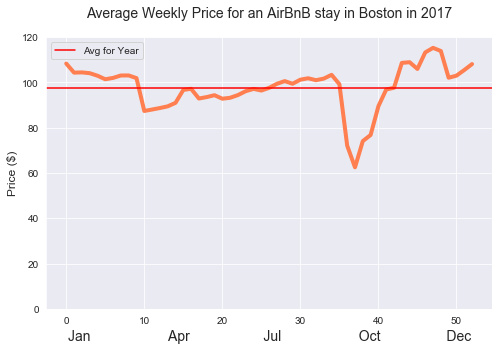

In [83]:
# Line plot visualization of weekly average price per night

# Create plot size
f, ax = plt.subplots(figsize=(8,5))
# Set background style
sns.set_style("darkgrid")
# Plot data
sns.lineplot(x="week_number",y="price",data=weekly,color="coral",linewidth=4)

# Add titles and labels
plt.title("Average Weekly Price for an AirBnB stay in Boston in 2017",fontsize=14)
plt.xlabel("Jan                    Apr                   Jul                 "
           "   Oct                 Dec",fontsize=14)
plt.ylabel("Price ($)",fontsize=12)

# Set y-axis to 120
plt.ylim(0,120)

# Add mean line for year
plt.axhline(calendar['price'].mean(),color='r',label='Avg for Year')
ax.legend()

# Move title and plot slightly further apart
ttl = ax.title
ttl.set_position([.5, 1.05]);

### c) What is the monthly occupancy ratio for the city?

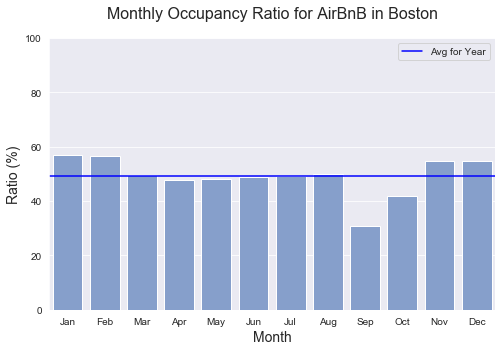

In [84]:
# Bar plot visualization of monthly occupancy ratio
[create_plot(occ_ratio_per_month,"date","available",100,
             title="Monthly Occupancy Ratio for AirBnB in Boston",
             xlabel="Month",
             ylabel="Ratio (%)",
             meanline = "available")];

### d) What is the monthly average price/night per neighbourhood?

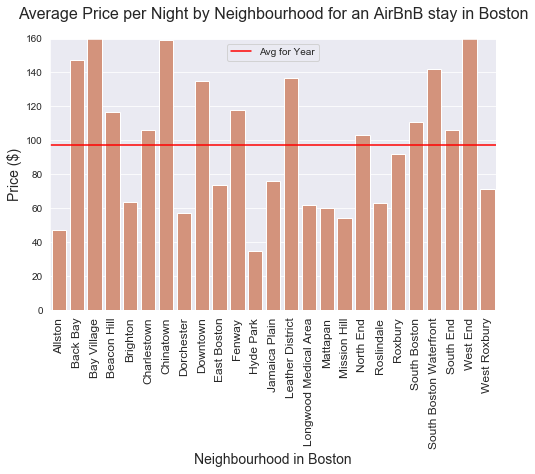

In [85]:
# Bar plot visualization of neighbourhood average price

[create_plot(hood_avg_price_per_month,"neighbourhood","price",160,
             title="Average Price per Night by Neighbourhood for an AirBnB stay in Boston",
             xlabel="Neighbourhood in Boston",
             ylabel="Price ($)",
             meanline = "price",
             xticklabel=True)];

### e) What is the occupancy ratio per neighbourhood?

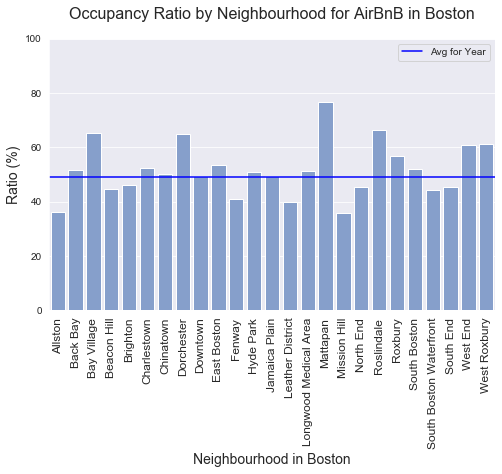

In [86]:
# Bar plot visualization of neighbourhood average occupancy

[create_plot(hood_occ,"neighbourhood","available",100,
             title="Occupancy Ratio by Neighbourhood for AirBnB in Boston",
             xlabel="Neighbourhood in Boston",
             ylabel="Ratio (%)",
             meanline = "available",
             xticklabel=True)];

## 6) Deploy model or results

We can get a conclusion from this analysis.
1.The price/night is the lowest in Sep.
2.The occupancy ratio is the lowest in Sep.
3.From Monday to Sunday, the price is almost the same.
4.The price for Bay Village is the highest(the occupancy ratio is pretty good), but Hyde Park is the lowest.